<a href="https://colab.research.google.com/github/swarubm/Intro-to-EDA/blob/main/DC_3_Outliers_Removal_using_Z_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data = pd.read_csv("scholarship.csv")

In [7]:
df = data.copy()

In [8]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [9]:
df.shape

(1000, 3)

/tmp/ipython-input-3098457354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["semester_percentage"])
/tmp/ipython-input-3098457354.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])


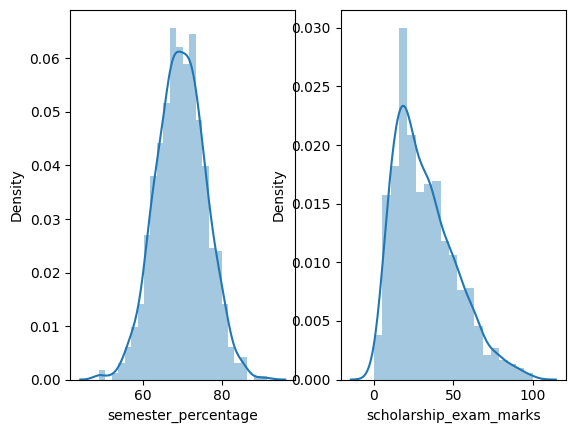

In [10]:
plt.subplot(1,2,1)
sns.distplot(data["semester_percentage"])
plt.subplot(1,2,2)
sns.distplot(data["scholarship_exam_marks"])
plt.show()

In [11]:
print("Mean = ", data["semester_percentage"].mean())  #we only require mean and std
print("Std = " ,data["semester_percentage"].std())
print("Max = " ,data["semester_percentage"].max())
print("Min = " ,data["semester_percentage"].min())

Mean =  69.6124
Std =  6.158978751323897
Max =  91.2
Min =  48.9


In [12]:
Mean =  69.6124
Std =  6.158978751323897
Max =  91.2
Min =  48.9

In [13]:
Highest_allowed = Mean + 3* Std
Lowest_allowed = Mean - 3* Std

print(Lowest_allowed,Highest_allowed)

51.13546374602831 88.08933625397168


In [14]:
# finding the outliers
data[(data["semester_percentage"]<Lowest_allowed) | (data["semester_percentage"]>Highest_allowed) ]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


# TRIMMING

In [15]:
data[(data["semester_percentage"]>Lowest_allowed) & (data["semester_percentage"]<Highest_allowed) ]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


In [18]:
data["z_score"] = (data["semester_percentage"]-data["semester_percentage"].mean())/data["semester_percentage"].std()

In [19]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [20]:
data[data["z_score"]<-3]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [23]:
data[data["z_score"]>3]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062


In [22]:
data[(data["z_score"]>-3) & (data["z_score"]<3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


In [24]:
#capping
upper_limit = data["semester_percentage"].mean()+ 3* data["semester_percentage"].std()
lower_limit = data["semester_percentage"].mean()- 3* data["semester_percentage"].std()

In [25]:
data["semester_percentage"] =np.where(data["semester_percentage"]>upper_limit,
         upper_limit,
         np.where(data["semester_percentage"]<lower_limit, lower_limit, data["semester_percentage"] ))

In [26]:
data

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239
